In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings("ignore")
sns.set()

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                       

In [10]:
#download the dataset to our project directory and take a look at the data types 
!wget -O data.csv "https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv"

--2020-09-30 04:47:59--  https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv
Resolving opendata.arcgis.com (opendata.arcgis.com)... 34.224.12.157, 50.19.49.12, 52.45.166.77, ...
Connecting to opendata.arcgis.com (opendata.arcgis.com)|34.224.12.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘data.csv’

    [          <=>                          ] 85,042,856  35.4MB/s   in 2.3s   

2020-09-30 04:48:04 (35.4 MB/s) - ‘data.csv’ saved [85042856]



In [11]:
data = pd.read_csv("data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221738 entries, 0 to 221737
Data columns (total 40 columns):
X                  214260 non-null float64
Y                  214260 non-null float64
OBJECTID           221738 non-null int64
INCKEY             221738 non-null int64
COLDETKEY          221738 non-null int64
REPORTNO           221738 non-null object
STATUS             221738 non-null object
ADDRTYPE           218024 non-null object
INTKEY             72027 non-null float64
LOCATION           217145 non-null object
EXCEPTRSNCODE      101335 non-null object
EXCEPTRSNDESC      11785 non-null object
SEVERITYCODE       221737 non-null object
SEVERITYDESC       221738 non-null object
COLLISIONTYPE      195287 non-null object
PERSONCOUNT        221738 non-null int64
PEDCOUNT           221738 non-null int64
PEDCYLCOUNT        221738 non-null int64
VEHCOUNT           221738 non-null int64
INJURIES           221738 non-null int64
SERIOUSINJURIES    221738 non-null int64
FATALITIES     

In [12]:
# The X and Y fields denote the longitude and latitude of the collisions. We can visualize the first few non-null collisions on a map.
map = folium.Map(location=[47.60, -122.33], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map)
locations = data[['Y', 'X']][data['Y'].notna()].head(1000)
locationlist = locations.values.tolist()
for point in range(len(locations)):
    folium.Marker(locationlist[point]).add_to(marker_cluster)
map

In [13]:
# The WEATHER field contains a description of the weather conditions during the time of the collision.
data['WEATHER'].value_counts().to_frame('count')

,count
Clear,114807
Raining,34038
Overcast,28556
Unknown,15131
Snowing,919
Other,860
Fog/Smog/Smoke,577
Sleet/Hail/Freezing Rain,116
Blowing Sand/Dirt,56
Severe Crosswind,26


In [14]:
# The ROADCOND field describes the condition of the road during the collision.
data['ROADCOND'].value_counts().to_frame('count')

,count
Dry,128660
Wet,48737
Unknown,15139
Ice,1232
Snow/Slush,1014
Other,136
Standing Water,119
Sand/Mud/Dirt,77
Oil,64


In [15]:
# The LIGHTCOND field describes the light conditions during the collision.
data['LIGHTCOND'].value_counts().to_frame('count')

,count
Daylight,119555
Dark - Street Lights On,50139
Unknown,13533
Dusk,6085
Dawn,2609
Dark - No Street Lights,1580
Dark - Street Lights Off,1239
Other,244
Dark - Unknown Lighting,24


In [16]:
#The SPEEDING field classifies collisions based on whether or not speeding was a factor in the collision. Blanks indicate cases where the vehicle was not speeding.
data['SPEEDING'].value_counts().to_frame()

,SPEEDING
Y,9936


In [17]:
#The SEVERITYCODE field contains a code that corresponds to the severity of the collision. and SEVERITYDESC contains a detailed description of the severity of the collision.
data['SEVERITYCODE'].value_counts().to_frame('count')

,count
1,137776
2,58842
0,21656
2b,3111
3,352


In [18]:
# The UNDERINFL field describes whether or not a driver involved was under the influence of drugs or alcohol. The values 0 and N denote that the driver was not under any influence while 1 and Y that they were.
data['UNDERINFL'].value_counts().to_frame('count')

,count
N,104002
0,81676
Y,5399
1,4230


In [19]:
#The PERSONCOUNT and VEHCOUNT indicate how many people and vehicles were involved in a collision respectively.
data['PERSONCOUNT'].describe()

count    221738.000000
mean          2.226741
std           1.469699
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          93.000000
Name: PERSONCOUNT, dtype: float64

In [20]:
data['VEHCOUNT'].describe()

count    221738.000000
mean          1.729442
std           0.830529
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          15.000000
Name: VEHCOUNT, dtype: float64

In [21]:
#The number of pedestrians involved in the collision helps identify severity involved 
data['PEDCOUNT'].describe()

count    221738.000000
mean          0.038095
std           0.201704
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: PEDCOUNT, dtype: float64

In [22]:
#The number of bicycles involved in the collision helps identify severity involved
data['PEDCYLCOUNT'].describe()

count    221738.000000
mean          0.027352
std           0.164512
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: PEDCYLCOUNT, dtype: float64

In [15]:
## Data Cleaning and Processing
# Removing unwanted cloumns, Checking blanks and duplicates
data.isna().sum()


X                    7478
Y                    7478
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             3714
INTKEY             149711
LOCATION             4593
EXCEPTRSNCODE      120403
EXCEPTRSNDESC      209953
SEVERITYCODE            1
SEVERITYDESC            0
COLLISIONTYPE       26451
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE        11979
SDOT_COLCODE            1
SDOT_COLDESC            1
INATTENTIONIND     191550
UNDERINFL           26431
WEATHER             26641
ROADCOND            26560
LIGHTCOND           26730
PEDROWNOTGRNT      216543
SDOTCOLNUM          94533
SPEEDING           211802
ST_COLCODE           9413
ST_COLDESC          26451
SEGLANEKEY              0
CROSSWALKKEY

In [23]:
data.duplicated().sum()

0

In [24]:
# Selecting relevant fields and dropping others.
data_clean = data[['X', 'Y', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
                   'SPEEDING', 'SEVERITYCODE', 'UNDERINFL',
                   'SERIOUSINJURIES', 'FATALITIES', 'INJURIES',
                   'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221738 entries, 0 to 221737
Data columns (total 15 columns):
X                  214260 non-null float64
Y                  214260 non-null float64
WEATHER            195097 non-null object
ROADCOND           195178 non-null object
LIGHTCOND          195008 non-null object
SPEEDING           9936 non-null object
SEVERITYCODE       221737 non-null object
UNDERINFL          195307 non-null object
SERIOUSINJURIES    221738 non-null int64
FATALITIES         221738 non-null int64
INJURIES           221738 non-null int64
PERSONCOUNT        221738 non-null int64
PEDCOUNT           221738 non-null int64
PEDCYLCOUNT        221738 non-null int64
VEHCOUNT           221738 non-null int64
dtypes: float64(2), int64(7), object(6)
memory usage: 25.4+ MB


In [25]:
#Fixing the SPEEDING field by encoding it to 0 for the blanks and 1 for the Y values.
data_clean['SPEEDING'] = data_clean['SPEEDING'].map({'Y': 1})
data_clean['SPEEDING'].replace(np.nan, 0, inplace=True)
data_clean['SPEEDING'].value_counts().to_frame()

,SPEEDING
0.0,211802
1.0,9936


In [26]:
#Records containing values as Unknown and Others can be considered as null values. Severity Code of 0 corresponds to unknown severity, which can also be treated as null.
data_clean.replace('Unknown', np.nan, inplace=True)
data_clean.replace('Other', np.nan, inplace=True)
data_clean['SEVERITYCODE'].replace('0', np.nan, inplace=True)

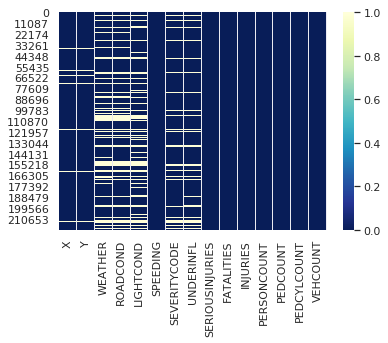

In [27]:
# We can quickly have an overview of the dataset and look at the frequency of missings records.
sns.heatmap(data_clean.isnull(), cmap='YlGnBu_r')
plt.show()

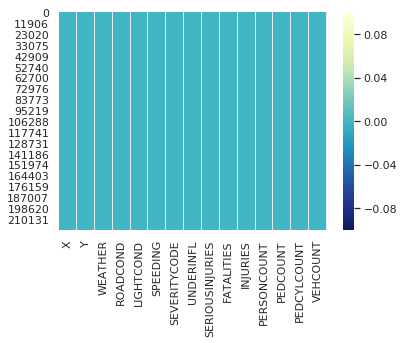

In [28]:
#We now drop the records having null values in order to clean the data.
data_clean.dropna(axis=0, inplace=True)
# Visualizing the dataset after dropping the null values shows that there are no more blanks.
sns.heatmap(data_clean.isnull(), cmap='YlGnBu_r')
plt.show()

In [29]:
#As the UNDERINFL field had data inconsistency, it is cleaned by converting all N and 0 values to 0 and all Y and 1 values to 1.
data_clean['UNDERINFL'] = data_clean['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171504 entries, 0 to 221737
Data columns (total 15 columns):
X                  171504 non-null float64
Y                  171504 non-null float64
WEATHER            171504 non-null object
ROADCOND           171504 non-null object
LIGHTCOND          171504 non-null object
SPEEDING           171504 non-null float64
SEVERITYCODE       171504 non-null object
UNDERINFL          171504 non-null int64
SERIOUSINJURIES    171504 non-null int64
FATALITIES         171504 non-null int64
INJURIES           171504 non-null int64
PERSONCOUNT        171504 non-null int64
PEDCOUNT           171504 non-null int64
PEDCYLCOUNT        171504 non-null int64
VEHCOUNT           171504 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 20.9+ MB


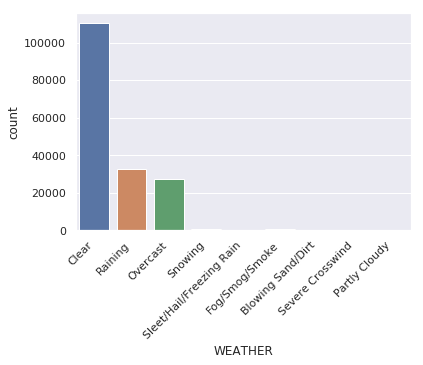

In [30]:
# Checking the distribution of data
ax = sns.countplot(data_clean['WEATHER'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

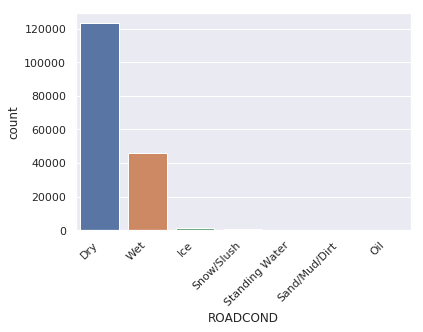

In [31]:
# Road Condition
ax = sns.countplot(data_clean['ROADCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

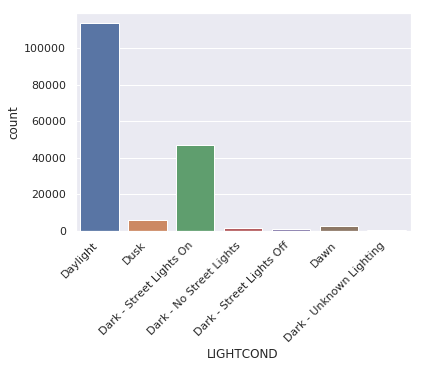

In [32]:
# light condition
ax = sns.countplot(data_clean['LIGHTCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

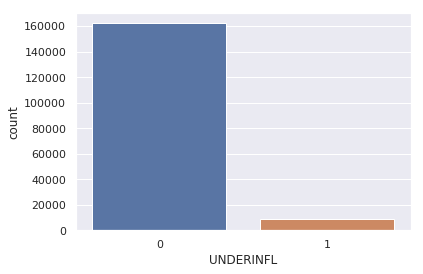

In [33]:
# Underinfluence of 
sns.countplot(data_clean['UNDERINFL'])

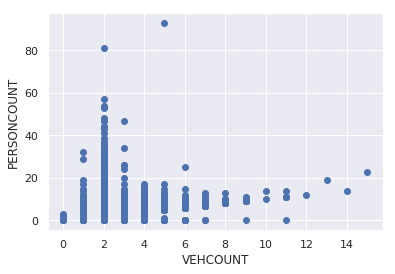

In [34]:
# Using scatter plot to show vehicle and person count involved in accident
ax = plt.scatter(data_clean['VEHCOUNT'], data_clean['PERSONCOUNT'])
plt.xlabel('VEHCOUNT')
plt.ylabel('PERSONCOUNT')
plt.show()

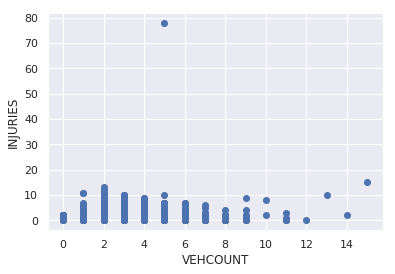

In [35]:
# Vehicle count and Injuries
ax = plt.scatter(data_clean['VEHCOUNT'], data_clean['INJURIES'])
plt.xlabel('VEHCOUNT')
plt.ylabel('INJURIES')
plt.show()

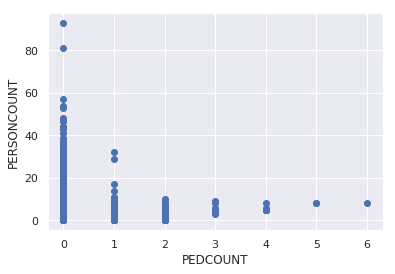

In [ ]:
# Pedistrian and person count
ax = plt.scatter(data_clean['PEDCOUNT'], data_clean['PERSONCOUNT'])
plt.xlabel('PEDCOUNT')
plt.ylabel('PERSONCOUNT')
plt.show()

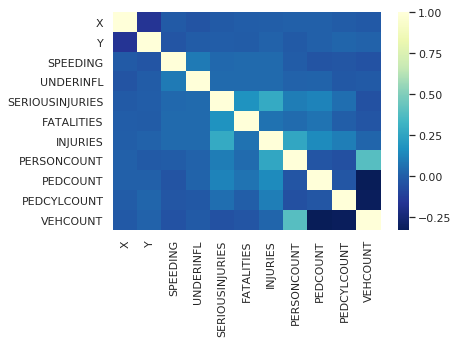

In [36]:
# plotting the clean data showing corellation 
sns.heatmap(data_clean.corr(), cmap='YlGnBu_r')
plt.show()

In [37]:
#hot encoding of the WEATHER, ROADCOND, and LIGHTCOND fields as they are categorical.
data_clean = pd.concat([data_clean.drop(['WEATHER', 'ROADCOND', 'LIGHTCOND'], axis=1), 
           pd.get_dummies(data_clean['ROADCOND']),
           pd.get_dummies(data_clean['LIGHTCOND']),
           pd.get_dummies(data_clean['WEATHER'])], axis=1)

In [ ]:
#Shuffling of the dataset is necessary as it is an unbalanced dataset.
data_clean = data_clean.sample(frac=1).reset_index(drop=True)
data_clean.head(5).T

,0,1,2,3,4
X,-122.326,-122.361,-122.33,-122.279,-122.313
Y,47.6104,47.6561,47.6042,47.5152,47.6591
SPEEDING,0,0,0,0,0
SEVERITYCODE,1,1,1,1,1
UNDERINFL,0,0,0,0,0
SERIOUSINJURIES,0,0,0,0,0
FATALITIES,0,0,0,0,0
INJURIES,0,0,0,0,0
PERSONCOUNT,2,2,0,2,2
PEDCOUNT,0,0,0,0,0


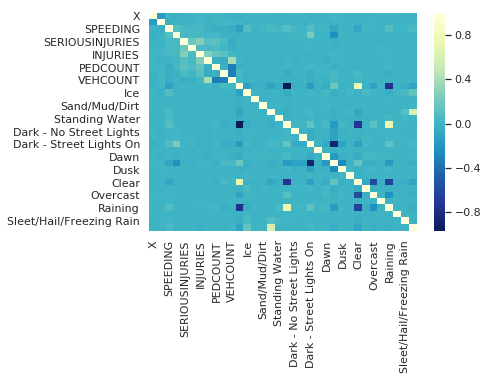

In [38]:
#Finding the correlation among the features of the dataset 
sns.heatmap(data_clean.corr(), cmap='YlGnBu_r')
plt.show()

In [39]:
#
from sklearn import preprocessing
x = data_clean.drop(['SEVERITYCODE'], axis=1)
y = data_clean[['SEVERITYCODE']]
data_clean_scaled = preprocessing.StandardScaler().fit(x).transform(x)
data_clean_scaled[0:3]

array([[-0.87565152, -1.78787493, -0.23628704, -0.23847975, -0.10640209,
        -0.04123484, -0.57981629, -0.35955477, -0.21020289, -0.1856599 ,
         0.05721618,  0.62623344, -0.07949479, -0.0169053 , -0.0183929 ,
        -0.06973573, -0.02391113, -0.60720945, -0.08993346, -0.0807113 ,
        -0.61619157, -0.01024523, -0.12010997,  0.71342445, -0.18553062,
        -0.01565095,  0.74472739, -0.05646148, -0.43411752, -0.00763617,
        -0.48292009, -0.01207437, -0.02521821, -0.06952435],
       [-1.03965304,  1.46479561, -0.23628704, -0.23847975, -0.10640209,
        -0.04123484, -0.57981629, -0.35955477, -0.21020289, -0.1856599 ,
         0.05721618, -1.59684861, -0.07949479, -0.0169053 , -0.0183929 ,
        -0.06973573, -0.02391113,  1.6468782 , -0.08993346, -0.0807113 ,
        -0.61619157, -0.01024523, -0.12010997, -1.40169011,  5.3899458 ,
        -0.01565095, -1.34277324, -0.05646148, -0.43411752, -0.00763617,
         2.07073597, -0.01207437, -0.02521821, -0.06952435],
  

In [40]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_clean_scaled, y, 
                                                    test_size=0.2, random_state=42)


In [41]:
## Modelling and Evaluation
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dTreeModel = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dTreeModel.fit(x_train, y_train)
dTreeModel
yHat = dTreeModel.predict(x_test)
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22523
           2       1.00      1.00      1.00     11162
          2b       1.00      1.00      1.00       555
           3       1.00      1.00      1.00        61

   micro avg       1.00      1.00      1.00     34301
   macro avg       1.00      1.00      1.00     34301
weighted avg       1.00      1.00      1.00     34301



In [42]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfcModel = RandomForestClassifier(n_estimators=75)
rfcModel.fit(x_train, y_train)
yHat = rfcModel.predict(x_test)
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22523
           2       1.00      1.00      1.00     11162
          2b       1.00      1.00      1.00       555
           3       1.00      1.00      1.00        61

   micro avg       1.00      1.00      1.00     34301
   macro avg       1.00      1.00      1.00     34301
weighted avg       1.00      1.00      1.00     34301



In [43]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression(C=0.01)
logRegModel.fit(x_train, y_train)
logRegModel
yHat = logRegModel.predict(x_test)
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22523
           2       1.00      1.00      1.00     11162
          2b       1.00      0.96      0.98       555
           3       1.00      0.98      0.99        61

   micro avg       1.00      1.00      1.00     34301
   macro avg       1.00      0.99      0.99     34301
weighted avg       1.00      1.00      1.00     34301



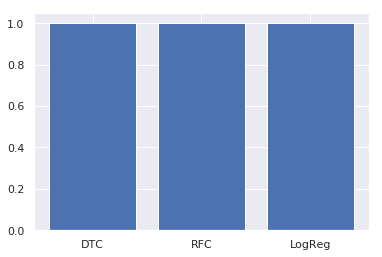

In [59]:
plt.bar(['DTC', 'RFC', 'LogReg'], [1.,1.,1.])
plt.show()